In [1]:
from Simul import get_RQ_MOA4,get_RQ_MOA5,get_RQ_MOA2,get_R_simul_wfT
import numpy as np
import matplotlib.pyplot as plt

# SIMULATION

## Initial condition

In [8]:
# 시뮬레이션에 사용되는 파라미터
alpha = np.pi/3
beta = 0.3
eta1 = 0.2
eta2 = 0.00
shift = 0

## initial condition visualization

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/matplotlib/cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/matplotlib/cbook.py:1398: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/matplotlib/cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/matplotlib/cbook.py:1398: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


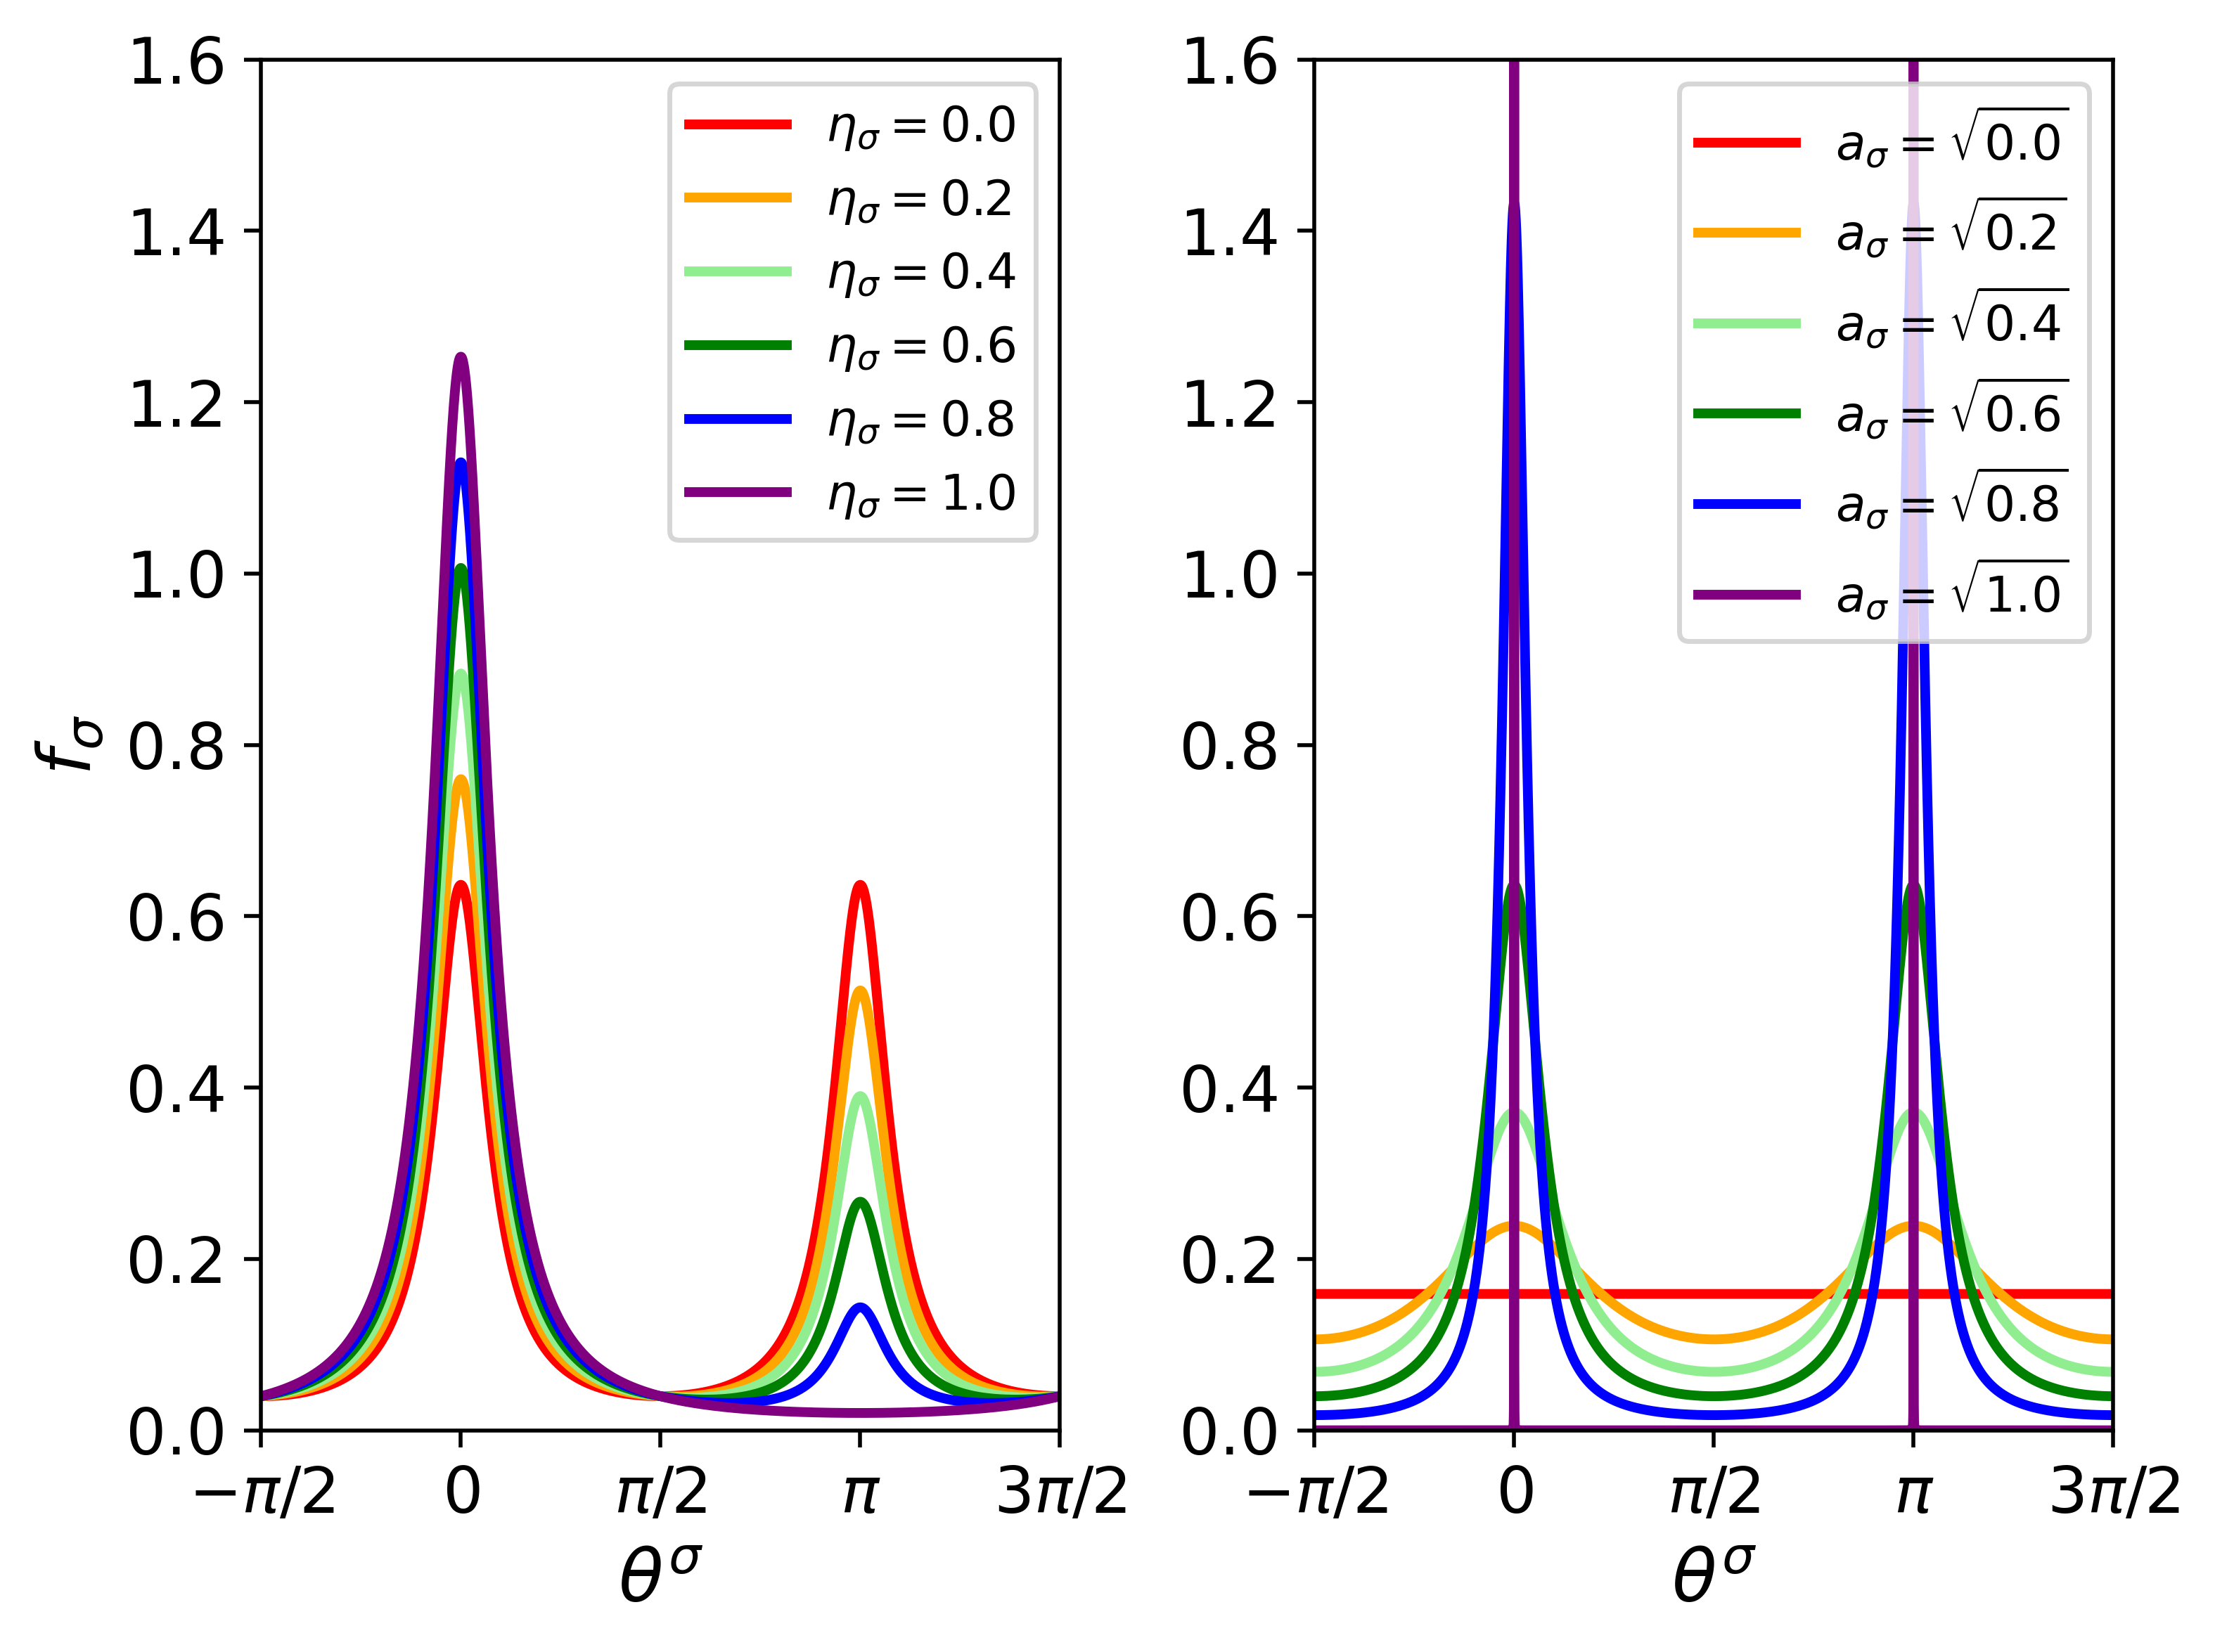

In [15]:
import numpy as np
import matplotlib.pyplot as plt
def dist_ab(x, a, b, eta):
    a_ = a*np.exp(1j*x)/(1-a*np.exp(1j*x))
    b_ = b*np.exp(1j*x)/(1-b*np.exp(1j*x))
    f1 = 1/(2*np.pi) * (1+ (a_+a_.conjugate()))
    f2 = 1/(2*np.pi) * (1+ (b_+b_.conjugate()))
    f = (1+eta)/2 *f1+ (1-eta)/2 *f2
    return np.real(f)


def dist_a(x, a, eta):
    f = 1/(np.pi) * (1-a**2 * np.cos(2*x)+eta*a*(1-a**2)*np.cos(x)) / (1-2*a**2*np.cos(2*x)+a**4) - 1/(2*np.pi)
    return f
x = np.linspace(-np.pi/2, 3*np.pi/2, 10000)
xs_ = np.linspace(-np.pi/2, 3*np.pi/2, 5)
A2 = np.sqrt(0.6)
a2 =  A2*np.exp(0*1j)
b2 =  a2* np.exp(np.pi*1j)
xs_
# f = dist_ab(x,a2,b2,eta=0.1)
# f2 = dist_a(x,a2,eta=0.1)
# plt.plot(x,f)
plt.figure(dpi=500)
ax  = plt.subplot(121)
color = ['red','orange','lightgreen','green','blue','purple']
for i in range(6):
    plt.plot(x,dist_a(x,a2,eta=0.2*i),color = color[i],lw=2,label=rf'$\eta_\sigma = {0.2*i:.01f}$')
plt.xlim(-np.pi/2,3*np.pi/2)
plt.legend()
plt.ylim(0,)
plt.yticks(fontsize=13)
plt.xticks([*xs_],[r'$-\pi/2$',r'$0$',r'$\pi/2$',r'$\pi$',r'$3\pi/2$'],fontsize=13)
plt.ylabel(r'$f_\sigma$',fontsize=15)
plt.xlabel(r'$\theta^\sigma$',fontsize=15)

plt.subplot(122)
color = ['red','orange','lightgreen','green','blue','purple']
for i in range(6):
    A2 = np.sqrt(0.2*i)
    a2 =  A2*np.exp(0*1j)
    plt.plot(x, dist_a(x, a2-1e-6, eta=0), color=color[i], lw=2, label=rf'$a_\sigma = \sqrt{{{0.2*i:.01f}}}$')
    A2 = np.sqrt(0.6)
    a2 =  A2*np.exp(0*1j)
plt.xlim(-np.pi/2,3*np.pi/2)
plt.legend()
plt.gca().sharey(ax)

plt.ylim(0,1.6)
plt.yticks(fontsize=13)
plt.xticks([*xs_],[r'$-\pi/2$',r'$0$',r'$\pi/2$',r'$\pi$',r'$3\pi/2$'],fontsize=13)
# plt.ylabel(r'$f_\sigma$',fontsize=15)
plt.xlabel(r'$\theta^\sigma$',fontsize=15)
plt.tight_layout()

### OA ANSATZ

In [6]:
# 시뮬레이션 시간 설정
t_end = 1000
# Community 2의 초기 Daido parameter 설정
Q_init = 0.6
# Community 1의 초기 Daido parameter = 1

# OA ansatz
R1_5,R2_5,Q1_5,Q2_5,t = get_RQ_MOA5(1,Q_init,alpha=alpha,beta=beta,eta1=eta1,eta2=eta2,shift=shift,t_end=t_end,dt=0.1)
# R1_4,R2_4,Q1_4,Q2_4,t = get_RQ_MOA4(1,Q_init,alpha=alpha,beta=beta,eta1=eta1,eta2=eta2,shift=shift,t_end=t_end,dt=0.1)
# R1_2,R2_2,Q1_2,Q2_2,t = get_RQ_MOA2(1,Q_init,alpha=alpha,beta=beta,eta1=eta1,eta2=eta2,shift=shift,t_end=t_end,dt=0.1)


### SIMULATION with System size N

In [9]:
N = 5000
R1_s_reg,R2_s_reg,Q1_s_reg,Q2_s_reg,t,thetas_reg = get_R_simul_wfT(1.,Q_init,N,alpha=alpha,beta=beta,eta1=eta1,eta2=eta2,shift=shift,t_end=t_end,dt=0.1,seed=None)

# Visualization

## Comparision with simulation and OA ansatz for $Q$

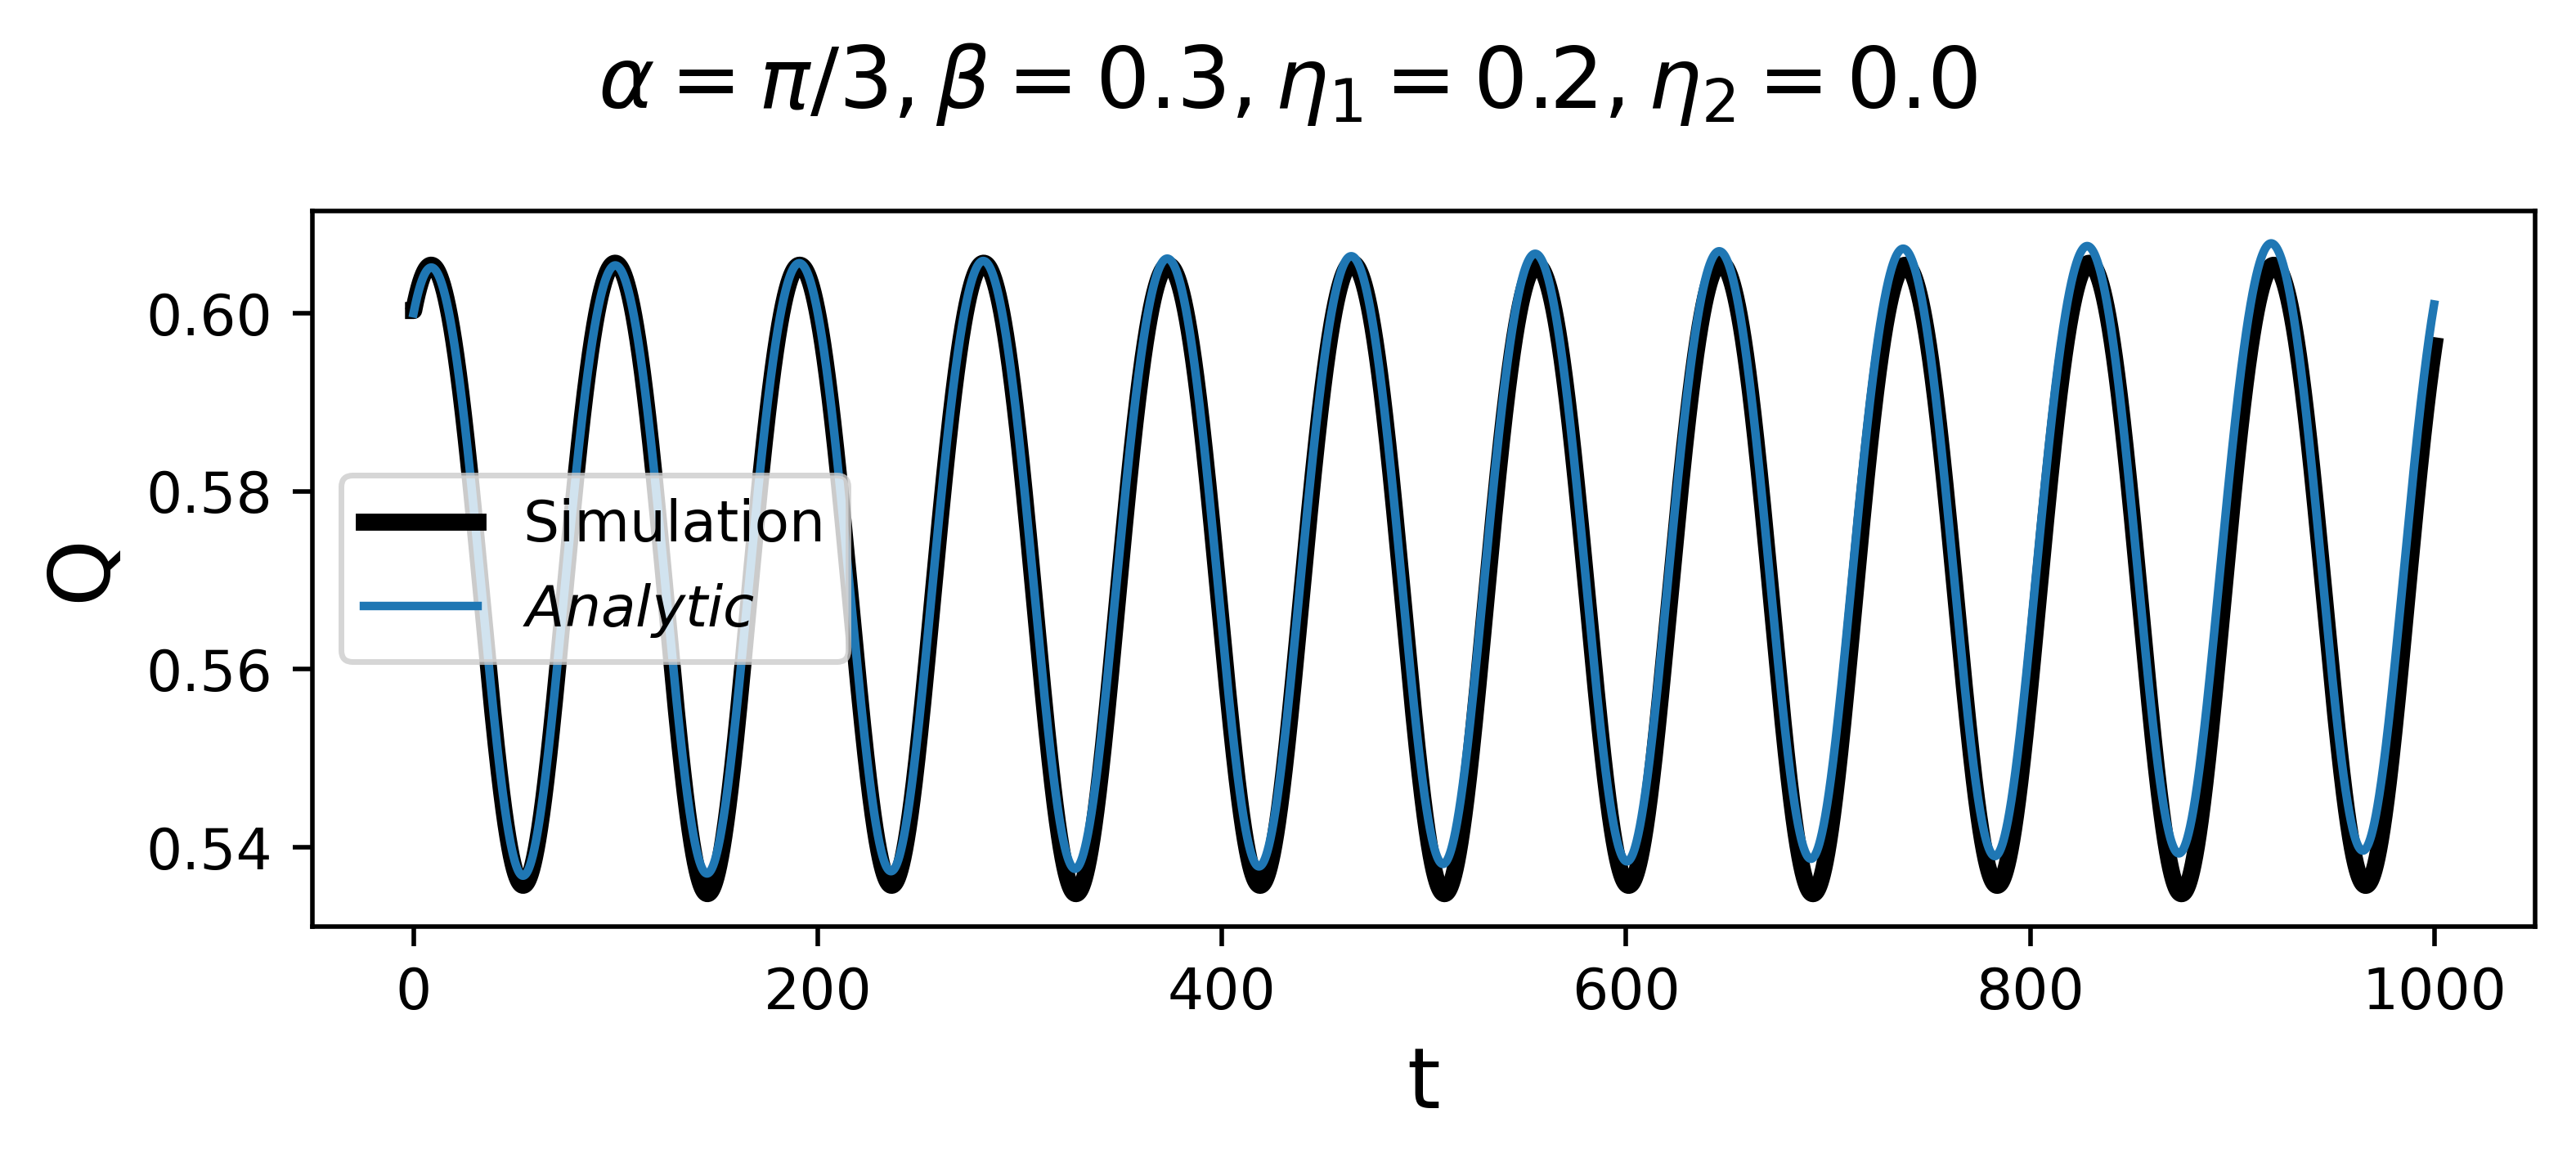

In [ ]:
plt.figure(dpi=500)

plt.subplot(211)
plt.plot(t,Q2_s_reg,label='Simulation',color='black',lw=3,zorder=0)
plt.plot(t,Q2_5,label=rf'$Analytic$')

plt.legend()
plt.ylabel('Q',fontsize=15)
plt.xlabel('t',fontsize=15)
# for a in nums:
    # plt.plot(t_,Q2_S[a])
plt.suptitle(rf'$\alpha=\pi/3,\beta={beta},\eta_1 = {eta1},\eta_2 = {eta2}$',fontsize=15)
# plt.xlim(0,3000)
# plt.ylim(0.0,1.05)
plt.tight_layout()

## Comparision with simulation and OA ansatz for $R$

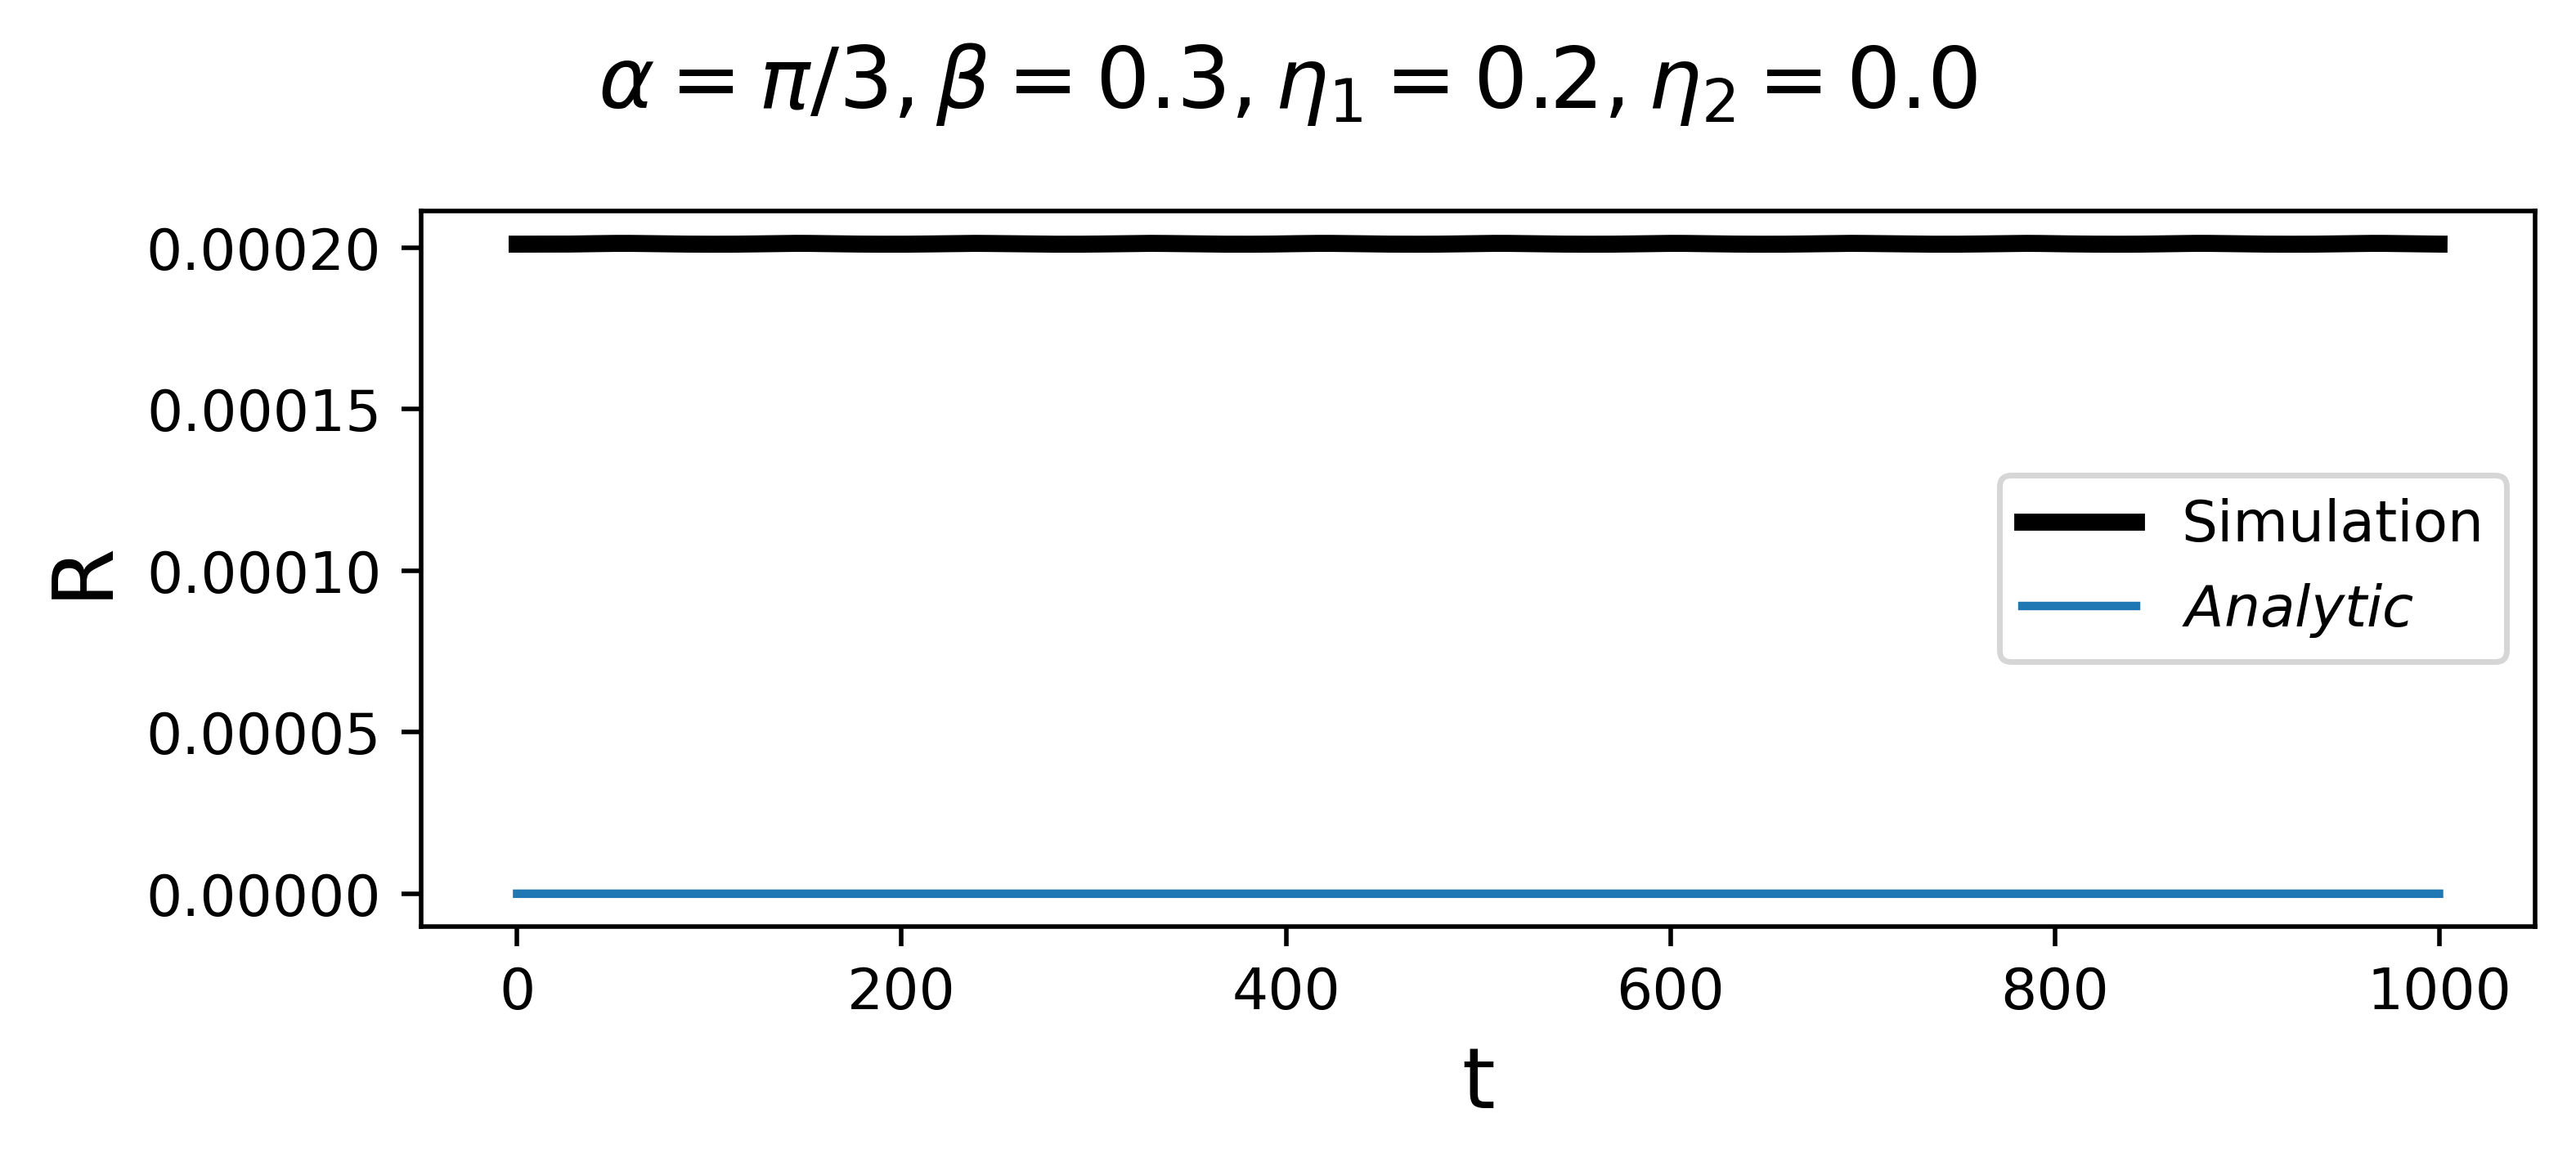

In [14]:
plt.figure(dpi=500)

plt.subplot(211)
plt.plot(t,R2_s_reg,label='Simulation',color='black',lw=3,zorder=0)
plt.plot(t,R2_5,label=rf'$Analytic$')

plt.legend()
plt.ylabel('R',fontsize=15)
plt.xlabel('t',fontsize=15)

plt.suptitle(rf'$\alpha=\pi/3,\beta={beta},\eta_1 = {eta1},\eta_2 = {eta2}$',fontsize=15)
# plt.xlim(0,3000)
# plt.ylim(0.0,1.05)
plt.tight_layout()